In [1]:
# Import Dependencies
import pandas as pd
import requests
import json
from datetime import datetime
import dateutil
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
# Testing the timestamps from data in 2017 data set
# Wanted to test if there was data for tickets given between 2AM and 10 AM 
# and the number of tickets without a time stamp



In [3]:
   # Create a reference the CSV file desired
csv_path = "ParkingData/SepMOMData/Parking_Violations_Issued_in_September_2017.csv"

# Read the CSV into a Pandas DataFrame
TestParkingJun17 = pd.read_csv(csv_path)

# Print the first five rows of data to the screen
TestParkingJun17.head()


,X,Y,OBJECTID,ROWID_,DAY_OF_WEEK,HOLIDAY,WEEK_OF_YEAR,MONTH_OF_YEAR,ISSUE_TIME,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,BODY_STYLE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.038703,38.900206,2756244,NaN,NaN,NaN,NaN,NaN,NaN,P280,EXPIRATION TIME ON METER RECEIPT LAPSED,1700 BLOCK H ST NW NORTH SIDE,OH,NaN,808462,7242.0,396643,136928,2017-09-01T20:59:00.000Z
1,-77.038703,38.900206,2756245,NaN,NaN,NaN,NaN,NaN,NaN,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1700 BLOCK H ST NW NORTH SIDE,CT,NaN,808462,7242.0,396643,136928,2017-09-01T21:06:00.000Z
2,-77.038703,38.900206,2756246,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,NaN,808462,7242.0,396643,136928,2017-09-01T21:11:00.000Z
3,-77.038703,38.900206,2756247,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,NaN,808462,7242.0,396643,136928,2017-09-01T21:14:00.000Z
4,-77.038703,38.900206,2756248,NaN,NaN,NaN,NaN,NaN,NaN,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,NY,NaN,808462,7242.0,396643,136928,2017-09-01T21:16:00.000Z


In [4]:
TestParkingJun17 = TestParkingJun17.drop(columns=["ROWID_","DAY_OF_WEEK",
                          "BODY_STYLE","HOLIDAY",
                          "WEEK_OF_YEAR","MONTH_OF_YEAR","ISSUE_TIME"])

TestParkingJun17.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE
0,-77.038703,38.900206,2756244,P280,EXPIRATION TIME ON METER RECEIPT LAPSED,1700 BLOCK H ST NW NORTH SIDE,OH,808462,7242.0,396643,136928,2017-09-01T20:59:00.000Z
1,-77.038703,38.900206,2756245,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1700 BLOCK H ST NW NORTH SIDE,CT,808462,7242.0,396643,136928,2017-09-01T21:06:00.000Z
2,-77.038703,38.900206,2756246,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,808462,7242.0,396643,136928,2017-09-01T21:11:00.000Z
3,-77.038703,38.900206,2756247,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,808462,7242.0,396643,136928,2017-09-01T21:14:00.000Z
4,-77.038703,38.900206,2756248,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,NY,808462,7242.0,396643,136928,2017-09-01T21:16:00.000Z


In [5]:
date = TestParkingJun17["TICKET_ISSUE_DATE"].tolist()
date = [dateutil.parser.parse(day) for day in date]

date

days = [date[x].day for x in range(0,len(date))]
years = [date[x].year for x in range(0,len(date))]
months = [date[x].month for x in range(0,len(date))]
hours = [date[x].hour for x in range(0,len(date))]
weekday_name = [date[x].strftime('%A') for x in range(0,len(date))]
weekday_number = [date[x].weekday() for x in range(0,len(date))]
minutes = [date[x].minute for x in range(0,len(date))]

TestParkingJun17["YEAR"] = years
TestParkingJun17["MONTH"] = months
TestParkingJun17["DAY"] = days
TestParkingJun17["HOUR"] = hours
TestParkingJun17["MINUTE"] = minutes
TestParkingJun17["DAY OF WEEK"] = weekday_name
TestParkingJun17["NUMBERED DAY OF WEEK"] = weekday_number



TestParkingJun17.head()

,X,Y,OBJECTID,VIOLATION_CODE,VIOLATION_DESCRIPTION,LOCATION,RP_PLATE_STATE,ADDRESS_ID,STREETSEGID,XCOORD,YCOORD,TICKET_ISSUE_DATE,YEAR,MONTH,DAY,HOUR,MINUTE,DAY OF WEEK,NUMBERED DAY OF WEEK
0,-77.038703,38.900206,2756244,P280,EXPIRATION TIME ON METER RECEIPT LAPSED,1700 BLOCK H ST NW NORTH SIDE,OH,808462,7242.0,396643,136928,2017-09-01T20:59:00.000Z,2017,9,1,20,59,Friday,4
1,-77.038703,38.900206,2756245,P281,FAIL TO DISPLAY A MULTISPACE METER RECEIPT,1700 BLOCK H ST NW NORTH SIDE,CT,808462,7242.0,396643,136928,2017-09-01T21:06:00.000Z,2017,9,1,21,6,Friday,4
2,-77.038703,38.900206,2756246,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,808462,7242.0,396643,136928,2017-09-01T21:11:00.000Z,2017,9,1,21,11,Friday,4
3,-77.038703,38.900206,2756247,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,MD,808462,7242.0,396643,136928,2017-09-01T21:14:00.000Z,2017,9,1,21,14,Friday,4
4,-77.038703,38.900206,2756248,P039,PARK AT EXPIRED METER,1700 BLOCK H ST NW SOUTH SIDE,NY,808462,7242.0,396643,136928,2017-09-01T21:16:00.000Z,2017,9,1,21,16,Friday,4


In [6]:
grouped_hours = TestParkingJun17[["OBJECTID","HOUR","MINUTE"]]
print(len(grouped_hours))

cleaned_hours = grouped_hours.drop(grouped_hours[(grouped_hours["HOUR"] == 0) & (grouped_hours["MINUTE"]==0)].index)
cleaned_hours = cleaned_hours.drop(columns = ["MINUTE"])
cleaned_hours = cleaned_hours.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
print(len(cleaned_hours))
print(len(grouped_hours) - len(cleaned_hours))

cleaned_hours = cleaned_hours.groupby(["HOUR"],as_index=False).count()


# cleaned_hours["HOUR_SORT"] = [15,16,17,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# cleaned_hours = cleaned_hours.sort_values(by=["HOUR_SORT"])
# cleaned_hours = cleaned_hours.reset_index(drop=True)
cleaned_hours


107067
107012
55


,HOUR,TICKETS ISSUED
0,0,2603
1,1,2966
2,2,2090
3,3,1071
4,4,487
5,5,391
6,6,137
7,7,6084
8,8,4779
9,9,7318


Text(0.5, 1.0, 'Tickets Issued by Hour of Day')

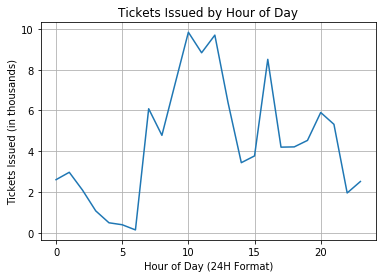

In [7]:
x = cleaned_hours["HOUR"]
tickets_hour = cleaned_hours["TICKETS ISSUED"]/1000
x_ticks = cleaned_hours["HOUR"]
plt.plot(x,tickets_hour)
plt.grid()
plt.ylabel("Tickets Issued (in thousands)")
plt.xlabel("Hour of Day (24H Format)")
plt.title("Tickets Issued by Hour of Day")
#plt.xticks(cleaned_hours["HOUR_SORT"], x_ticks)

#plt.savefig("Output/tickets_by_hour_18.png",dpi=500, bbox_inches="tight")

In [8]:
# weekday_data = Parking2018[["OBJECTID","DAY OF WEEK","NUMBERED DAY OF WEEK"]]
# weekday_data = weekday_data.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
# weekday_data = weekday_data.groupby(["DAY OF WEEK"],as_index=False).agg({"TICKETS ISSUED":'count',"NUMBERED DAY OF WEEK":'sum'})
# weekday_data["NUMBERED DAY OF WEEK"] = weekday_data["NUMBERED DAY OF WEEK"]/weekday_data["TICKETS ISSUED"]
# weekday_data = weekday_data.sort_values(by=["NUMBERED DAY OF WEEK"])
# weekday_data





In [9]:
# x = weekday_data["DAY OF WEEK"]
# tickets_day = weekday_data["TICKETS ISSUED"]/1000
# plt.plot(x,tickets_day,marker='o')
# plt.grid()
# plt.ylabel("Tickets Issued (in thousands)")
# plt.xlabel("Day of Week")
# plt.title("Tickets Issued by Day of Week")
# plt.xticks(weekday_data["NUMBERED DAY OF WEEK"], weekday_data["DAY OF WEEK"], rotation=40)
# plt.savefig("Output/tickets_by_dayofweek_18.png", dpi=500, bbox_inches="tight")

In [10]:
# grouped_months = Parking2018[["OBJECTID","MONTH"]]

# grouped_months = grouped_months.rename({"OBJECTID":"TICKETS ISSUED"},axis=1)
# grouped_months = grouped_months.groupby(["MONTH"],as_index=False).count()
# grouped_months




In [11]:
# x = grouped_months["MONTH"]
# tickets_hour = grouped_months["TICKETS ISSUED"]/1000
# x_ticks = ["January","February","March","April","May","June","July","August","September","October","November","December"]
# plt.plot(x,tickets_hour,marker='o')
# plt.grid()
# plt.ylabel("Tickets Issued (in thousands)")
# plt.xlabel("Month")
# plt.title("Tickets Issued by Month")
# plt.xticks(grouped_months["MONTH"], x_ticks, rotation=40)
# plt.savefig("Output/tickets_by_month_18.png",dpi=500, bbox_inches="tight")
